# Hi All,

## This is one of My Weekend Projects that I intend to work on!

### The Objective here is to "Predict if a person is detected with Diabetes or Not".

### Now the Blueprint for this project will be in the following steps:

1. Load the Data, inspect it and perform Data Handling.
2. Perfrom some EDA steps and find some inferences or patterns available.
3. Transform the Data for Modelling process.
4. Since it is a Classification Problem for discrete vairable, we'll be Naive and target **Logistic Regression** here.
5. Evaluate the final results and Compare for different models built over.

## Let's begin

In [186]:
# Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [187]:
# Reading the data
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [188]:
# Now let's check the shape,info and describe
print(df_diabetes.info())
print('----------------')
print('Shape: ',df_diabetes.shape)
print('-----------------')
print(df_diabetes.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
----------------
Shape:  (768, 9)
-----------------
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000

So we get to see that the **Data Set** is free of any Null Values, which is a great sign.
Next we can go ahead and see the conversion rate along with the Outlier Analysis

In [189]:
def conversion_rate(df,col):
    print('Conersion rate is: ' , round(sum(df[col])/len(df[col].index)*100,2))

In [190]:
conversion_rate(df_diabetes,'Outcome')
# Sowe have a conersion rate of 35%.

Conersion rate is:  34.9


<Figure size 864x864 with 0 Axes>

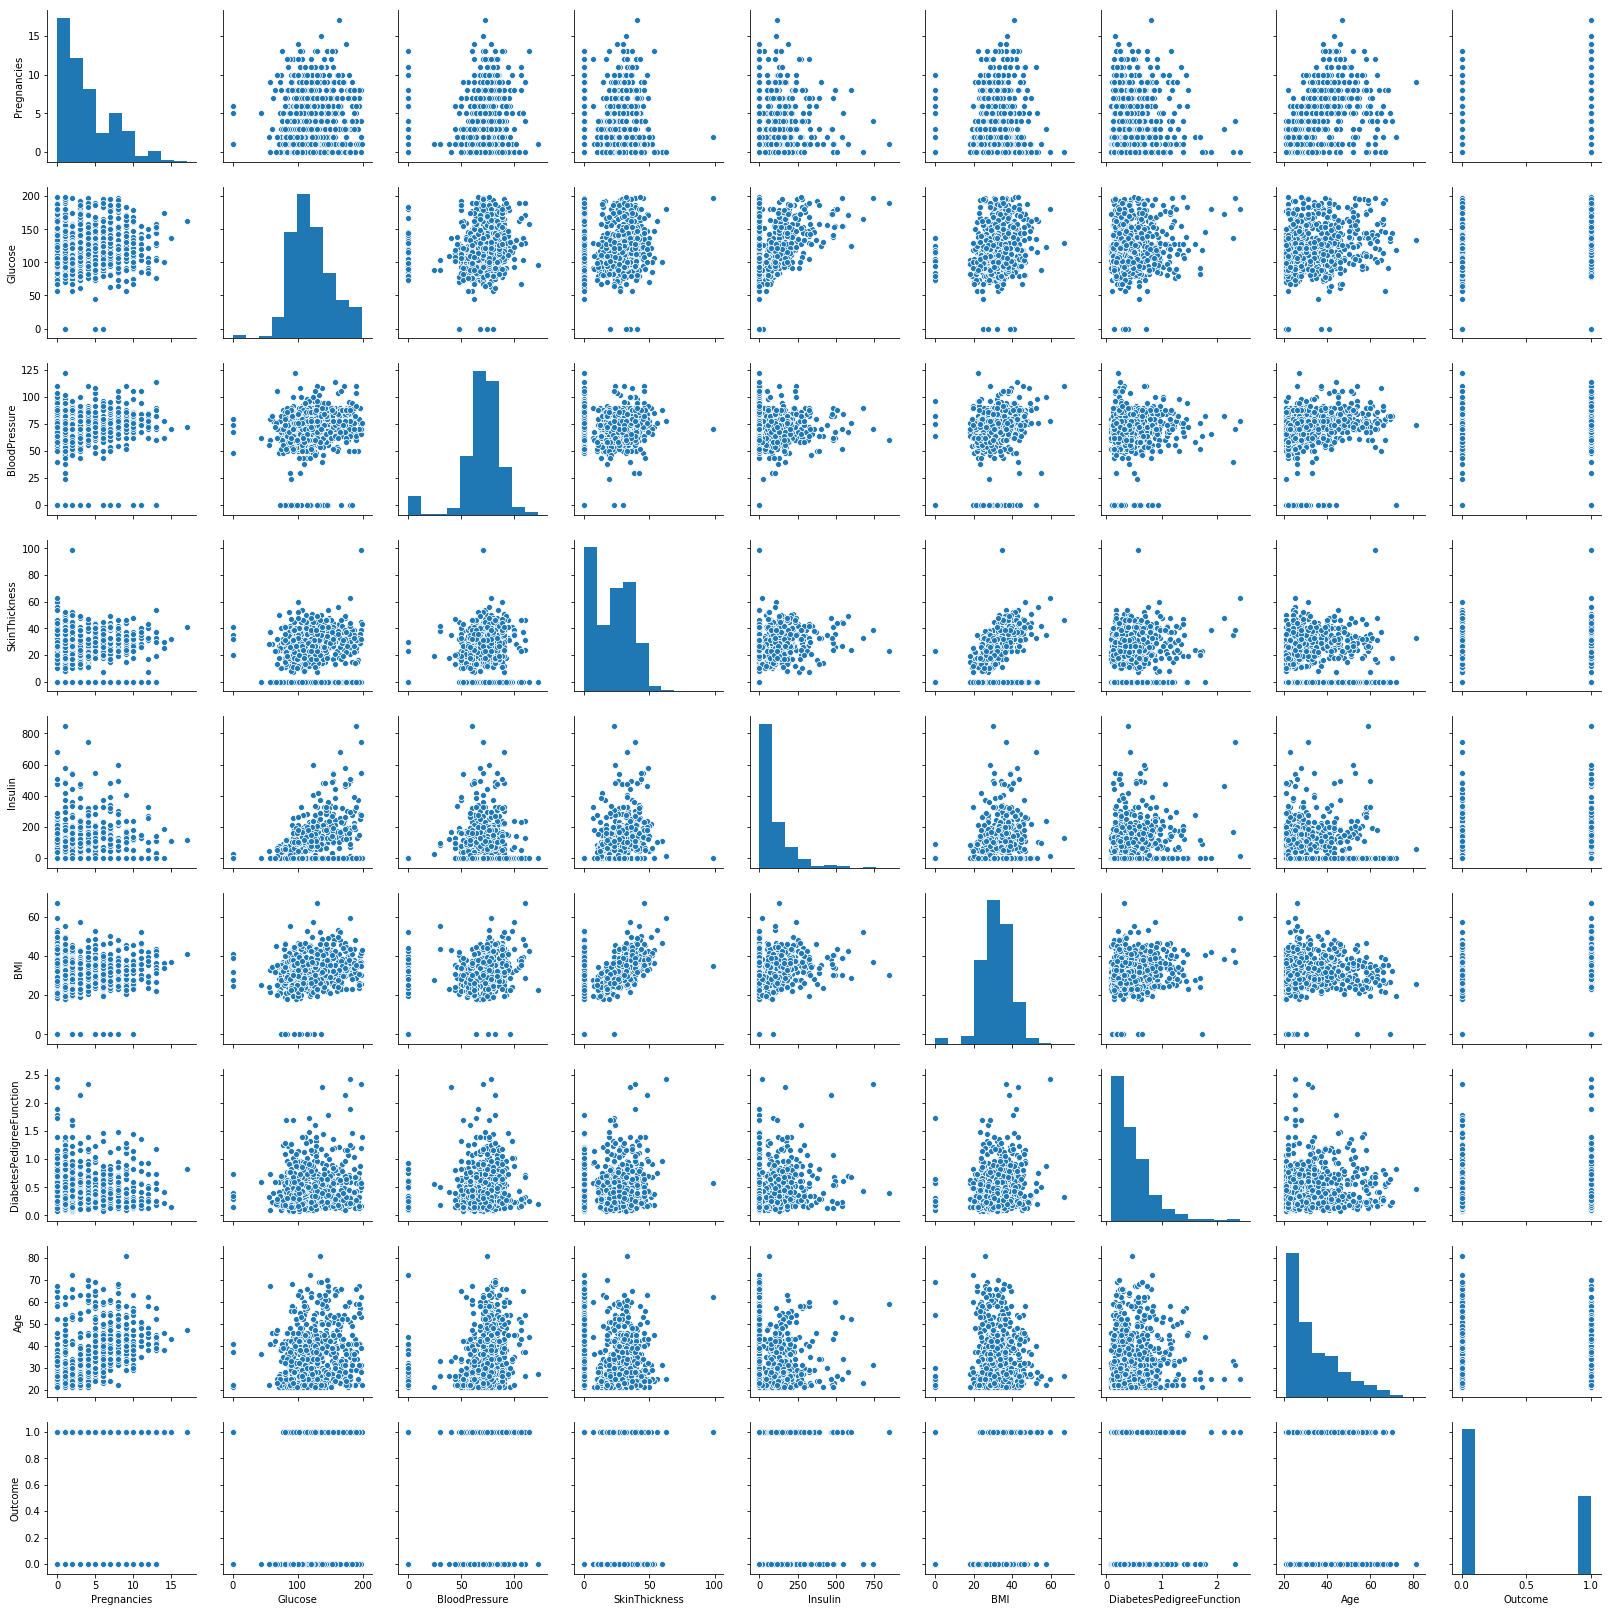

In [191]:
# Let's plot a pairplot for any patterns and then will go for Outlier Analysis
plt.figure(figsize=(12,12))
sns.pairplot(df_diabetes);

So we can see that there is some kind of **Linear/Curvy** pattern between some of the variables. Such as **Pregnancies vs Glucose, Age vs DiabetesPedigreeFunction**, etc.

In [192]:
def plot_barplot_without_hue(df,var1,var2):
    sns.barplot(x = var1,y=var2,data = df);
    plt.title('Barplot for '+var1 + ' vs. '+ var2);

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


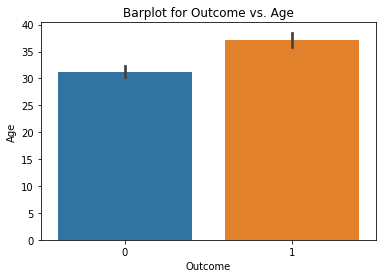

In [193]:
plot_barplot_without_hue(df_diabetes,'Outcome','Age')

In [194]:
def plot_outliers(df):
    cols = df.columns.to_list()
    x=1
    plt.figure(figsize=(12,12))
    for i in cols:
        plt.subplot(5,2,x)
        plt.subplots_adjust(wspace=1.8,hspace=0.4)
        sns.boxenplot(y = df[i],data = df);
        plt.title('Checking Outliers for: '+ i)
        x +=1

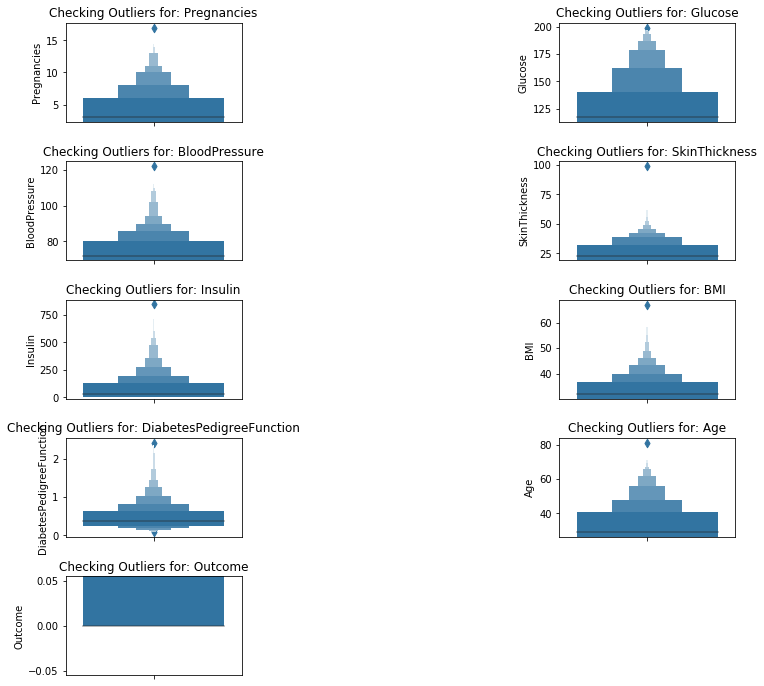

In [195]:
plot_outliers(df_diabetes)

So we see that yes there are maybe 1 or 2 outlying values,so we will use the **IQR** method to just deal of with the outlying values.

In [196]:
# We will look for the 92 Percentile
df_cleaned = df_diabetes.copy()
Q1 = df_cleaned.quantile(0.08)
Q3 = df_cleaned.quantile(0.92)
IQR_RANGE = Q3 - Q1
df_cleaned = df_cleaned[~((df_cleaned < (Q1-1.5*IQR_RANGE))| (df_cleaned > (Q3 + 1.5*IQR_RANGE))).any(axis=1)]
df_cleaned.shape

(761, 9)

So till Now we have seen the pattern in the Data set for the Diabetes Outcome with multiple Variables, but wait, we have not seen the correlation. Let's see that

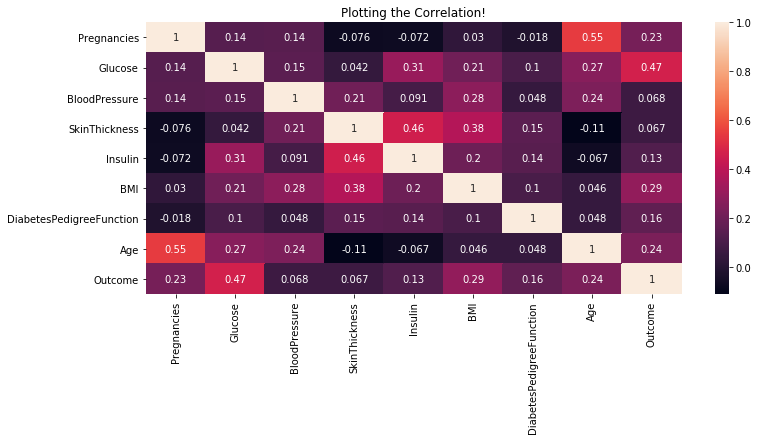

In [197]:
plt.figure(figsize=(12,5))
sns.heatmap(df_cleaned.corr(),annot=True,color='Yellow');
plt.title('Plotting the Correlation!');

So we see that there is not much of a correlation between the variables.
Now we will begin our Model Transformation for the Modelling process.
1. We will split the Data
2. Perform Scaling respectively.
3. Then perform the Logistic Regression.

In [198]:
# Getting the Target Variables and Predictor variables separated.
y = df_cleaned.Outcome
X = df_cleaned.drop('Outcome',axis =1)

In [199]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
5                     0.201   30

In [200]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [201]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [202]:
#Scaling of the variables
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [203]:
logistic_regression = LogisticRegression()
model = logistic_regression.fit(X_train,y_train)

In [204]:
model.coef_

array([[ 0.20111784,  1.06917405, -0.28797593,  0.03836291, -0.23647629,
         0.73383323,  0.32902119,  0.30498034]])

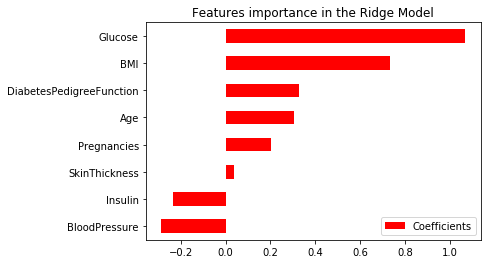

In [205]:
coefficients = pd.concat([pd.DataFrame(np.transpose(model.coef_),index = X.columns,columns =['Coefficients'])], axis = 1)
imp_coefs = pd.concat([coefficients.sort_values(by = 'Coefficients')])
imp_coefs.plot(kind = "barh", color='red')
plt.title("Features importance in the Ridge Model")
plt.show()

In [206]:
coefficients

Coefficients
Pregnancies                   0.201118
Glucose                       1.069174
BloodPressure                -0.287976
SkinThickness                 0.038363
Insulin                      -0.236476
BMI                           0.733833
DiabetesPedigreeFunction      0.329021
Age                           0.304980

In [207]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
r2score = r2_score(y_test,y_pred_test)
print(r2score)

0.058732188527585216


In [208]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

             precision    recall  f1-score   support

          0       0.88      0.84      0.86       161
          1       0.65      0.72      0.69        68

avg / total       0.81      0.80      0.81       229



So we get to see that Normal Logistic Regression is **Underfitting the Model**.
Although the important parameters are: **Glucose/BMI/DiabetesPredictionFunction and AGE**

In [209]:
model.score(X_test,y_test)

0.8034934497816594

OK! SO since Naive Logistic Regression did not gace us a better result. We would like to build a pipeline of Machine Learning ALgorithms and print their Accuracy and then make some final Results.

### We would like to perform XGB Classifier as it is one of the hottest CLassification Modelos right now!
**Gradient Boosting is the Technique where the New Models are trained to predict the residuals/errors of the prioer models. And based on the errors, the New Models are told to reduce the errors. It is more of an Ensemble technique.**

In [210]:
import xgboost as xgb

In [211]:
D_train = xgb.DMatrix(X_train,label=y_train)
D_test = xgb.DMatrix(X_test,label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 20  # The number of training iterations

model = xgb.train(param, D_train, steps)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [212]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.7277606114815418
Recall = 0.7558458165875046
Accuracy = 0.7641921397379913


In [213]:
y_pred_train = model.predict(D_train)
best_preds = np.asarray([np.argmax(line) for line in y_pred_train])
print('Train Accuracy: ' , accuracy_score(y_train,best_preds))

Train Accuracy:  0.8665413533834586


SO with **XGB Boosting ALgorithm** we get an **Overfitted Model**.

# Now let's build that Pipeline:

In [214]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [215]:
# Building the Pipeline with Different Models
classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb()
]
classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes'
]

In [216]:
# We can use this piece of code over and over again.
for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

K nearest neighbors  mean accuracy:  70.305 % std:  0.101 %
Decision Tree Classifier  mean accuracy:  71.439 % std:  0.059 %
SVM classifier with RBF kernel  mean accuracy:  75.197 % std:  0.068 %
SVM classifier with linear kernel  mean accuracy:  76.323 % std:  0.036 %
Gaussian Naive Bayes  mean accuracy:  72.381 % std:  0.126 %


In [217]:
# Choosing the Final Model
final_model_smv_lin = SVC(kernel='linear').fit(X_train, y_train)
final_model_gnb = gnb().fit(X_train, y_train)

test accuracy for SVM classifier with a linear kernel: 81.22 %


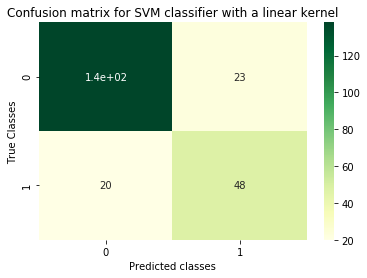

test accuracy for Gaussian naive bayes classifier: 77.29 %


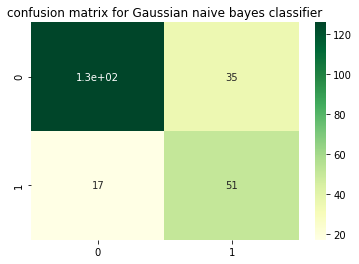

In [219]:
y_hat_svm = final_model_smv_lin.predict(X_test)
y_hat_gnb = final_model_gnb.predict(X_test)

print('test accuracy for SVM classifier with a linear kernel:'\
      , round(accuracy_score(y_test, y_hat_svm)*100, 2), '%')
plt.title('Confusion matrix for SVM classifier with a linear kernel')
sns.heatmap(confusion_matrix(y_test, y_hat_svm), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

print('test accuracy for Gaussian naive bayes classifier:', \
      round(accuracy_score(y_test, y_hat_gnb)*100, 2),'%')
plt.title('confusion matrix for Gaussian naive bayes classifier')
sns.heatmap(confusion_matrix(y_test, y_hat_gnb), annot=True, cmap="YlGn")
plt.show()

# Wooho! So we saw that using SVM with Linear Kernel gave us the best result of Accuracy of 81% and the Model is also not overfitting as the range of Train and Test Accuracy is 5% of difference.